In [77]:
import os
import seaborn as sns
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt

In [82]:
# Set style preset parameters from Seaborn 
sns.set_style("darkgrid")
sns.set_context("paper")

In [83]:
# For plot to appear in the notebook
%matplotlib inline 

In [84]:
value_column = 'abserror'
tests_df = pd.DataFrame()
for test in ['0','A','B','C','D','E','F','G','H','I','J']:
    folder = "/media/tais/My_Book_1/MAUPP/Traitement/Population_modelling_dasymetry/Results/Dakar/Random_Forest/Test_%s"%test
    file_name = "Test_%s_validation_level1"%test
    filepath = os.path.join(folder, file_name + '.dbf')
    gdf = gpd.read_file(filepath)
    tests_df['Test_%s'%test] = gdf[value_column]

In [85]:
tests_df.head()

,Test_0,Test_A,Test_B,Test_C,Test_D,Test_E,Test_F,Test_G,Test_H,Test_I,Test_J
0,1893.075628,1890.184656,1179.522330,843.485028,907.197371,1241.697904,1158.182779,963.763165,890.477977,900.094630,860.831313
1,1533.732780,1735.234639,969.658179,1720.101535,1293.544440,1036.177151,689.957119,648.736127,909.134744,809.047328,833.000444
2,2391.317431,476.717989,342.973874,2101.223085,650.551906,1090.874299,1578.646824,1227.401594,1692.485434,898.453442,1036.927949
3,1248.858786,34.763443,360.666074,391.927465,426.138408,471.102404,46.479244,259.724594,354.441671,345.105991,284.322885
4,310.480192,381.022431,476.126101,131.079002,200.627010,478.099853,407.506768,473.066145,354.259338,336.797368,362.305643


In [86]:
plot_df = pd.melt(tests_df, value_vars=list(tests_df.columns), value_name=value_column)

In [87]:
plot_df.head()

,variable,abserror
0,Test_0,1893.075628
1,Test_0,1533.732780
2,Test_0,2391.317431
3,Test_0,1248.858786
4,Test_0,310.480192


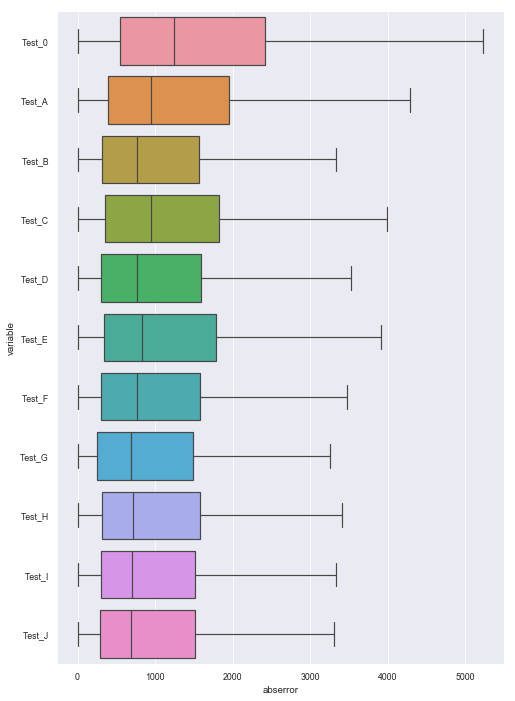

In [111]:
plt.figure(figsize=(8,12))
#sns.boxplot(x="variable", y="abserror", data=plot_df, orient="v")
sns.boxplot(x="abserror", y="variable", data=plot_df, orient="h", showfliers=False)
result_folder = "/media/tais/My_Book_1/MAUPP/Traitement/Population_modelling_dasymetry/Results/Dakar/Random_Forest"
plt.savefig(os.path.join(result_folder, "Dakar_boxplot_%s.svg"%value_column), dpi=300, bbox_inches='tight')

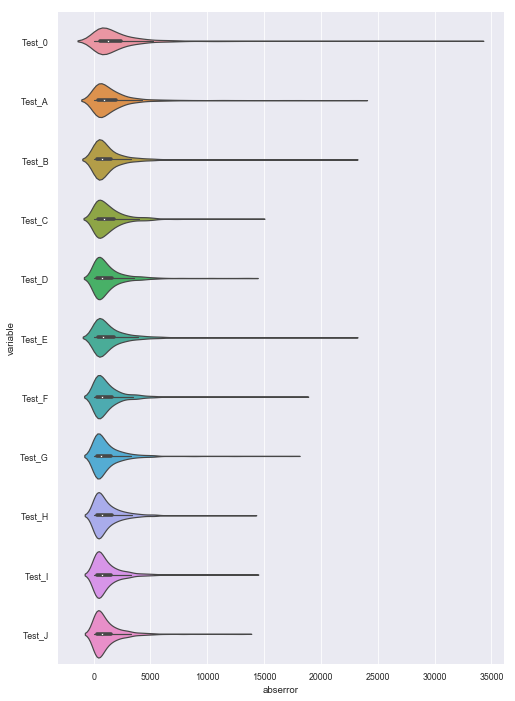

In [112]:
plt.figure(figsize=(8,12))
sns.violinplot(x="abserror", y="variable", data=plot_df, orient="h", showfliers=False)
result_folder = "/media/tais/My_Book_1/MAUPP/Traitement/Population_modelling_dasymetry/Results/Dakar/Random_Forest"
plt.savefig(os.path.join(result_folder, "Dakar_violin_%s.svg"%value_column), dpi=300, bbox_inches='tight')